#  Customer Churn Prediction

## 1. Project Overview & Introduction

### 🔹 Problem Statement / Motivation:  
Customer churn (i.e., the rate at which customers discontinue their service or product) poses a significant and persistent challenge for telecommunication companies. In a highly competitive market saturated with numerous service providers, customer acquisition costs are often substantially higher than customer retention costs. A high churn rate directly translates to:

Significant Revenue Loss: Each churned customer represents lost recurring revenue, impacting the company's financial stability and growth projections.

Reduced Customer Lifetime Value (CLTV): Churn diminishes the average CLTV, as customers are not retained long enough to realize their full revenue potential.

Increased Marketing & Acquisition Costs: To offset churn, companies are forced to invest more heavily in acquiring new customers, which can be an inefficient use of resources if underlying retention issues are not addressed.

Brand Erosion & Negative Word-of-Mouth: Dissatisfied or disengaged customers who churn may spread negative sentiments, damaging the company's reputation and deterring potential new customers.

Traditional reactive approaches to churn, such as exit surveys or last-ditch efforts, are often insufficient as they occur after the customer has already decided to leave. There is a critical need for a proactive and data-driven approach to identify customers at high risk of churning before they actually do.

This project aims to address this problem by leveraging historical customer data to develop a robust machine learning model capable of accurately predicting which customers are likely to churn. By identifying these "at-risk" customers early, the telecom company can implement targeted retention strategies, such as personalized offers, proactive customer support, or service adjustments, thereby mitigating revenue loss, enhancing customer satisfaction, and improving overall business profitability.

### 🔹 Dataset Description:
The dataset contains 3,738 customer records from a telecom provider. It includes customer demographics, service details, account information, and a target column `Churn`.

- Total Rows: 3,738  
- Features: 21  
- Target: `Churn` (Yes/No)

### 🔹 Goals / Objectives:
- Explore customer behavior and churn patterns  
- Build a model to predict churn  
- Identify key drivers of churn  
- Suggest actionable business recommendations

### 🔹 Technologies Used:
- Python  
- Pandas, NumPy  
- Matplotlib, Seaborn  
- Scikit-learn


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2.  Exploratory Data Analysis (EDA) Insights

In this section, we explore the dataset to uncover key patterns, clean anomalies, and prepare the data for modeling.


In [5]:
df = pd.read_excel(r'C:\Users\anxaa\OneDrive\Documents\Altamash\Imarticus PDFs\Classworks by me\ML Advanced\Dataset\Customer Churn.xlsx')

In [6]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,4495-LHSSK,Female,No,No,Yes,18,Yes,Yes,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,57.65,992.70,No
1,5791-KAJFD,Female,No,Yes,Yes,56,Yes,Yes,DSL,Yes,...,Yes,No,No,Yes,One year,Yes,Bank transfer (automatic),68.75,3808.00,No
2,3721-CNZHX,Male,No,No,No,15,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.80,304.60,No
3,4000-VGMQP,Male,No,Yes,Yes,38,Yes,Yes,DSL,No,...,Yes,No,Yes,Yes,One year,No,Credit card (automatic),78.95,2862.55,No
4,2194-IIQOF,Female,No,Yes,No,71,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),89.30,6388.65,No


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3738 entries, 0 to 3737
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3738 non-null   object 
 1   gender            3738 non-null   object 
 2   SeniorCitizen     3738 non-null   object 
 3   Partner           3738 non-null   object 
 4   Dependents        3738 non-null   object 
 5   tenure            3738 non-null   int64  
 6   PhoneService      3738 non-null   object 
 7   MultipleLines     3738 non-null   object 
 8   InternetService   3738 non-null   object 
 9   OnlineSecurity    3738 non-null   object 
 10  OnlineBackup      3738 non-null   object 
 11  DeviceProtection  3738 non-null   object 
 12  TechSupport       3738 non-null   object 
 13  StreamingTV       3738 non-null   object 
 14  StreamingMovies   3738 non-null   object 
 15  Contract          3738 non-null   object 
 16  PaperlessBilling  3738 non-null   object 


In [9]:
df.drop('customerID',axis=1,inplace=True)

In [10]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        5
Churn               0
dtype: int64

In [11]:
df.dropna(inplace=True)

In [12]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,3733.000000,3733.000000,3733.000000
mean,27.935441,67.844133,2054.323239
std,24.125728,28.945812,2193.355619
min,1.000000,18.400000,18.850000
25%,5.000000,45.300000,273.000000
50%,21.000000,74.750000,1151.550000
75%,49.000000,90.650000,3361.050000
max,72.000000,118.750000,8684.800000


In [13]:
import seaborn as sns

gender


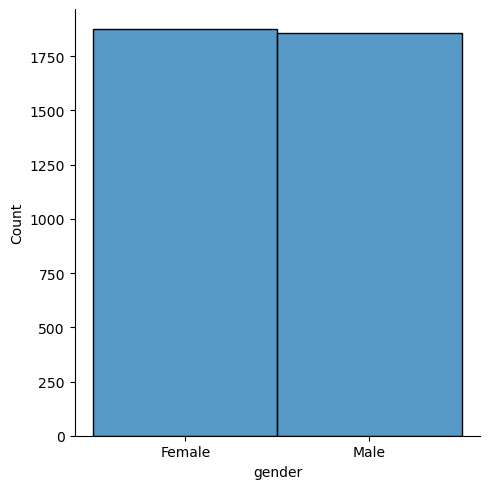

SeniorCitizen


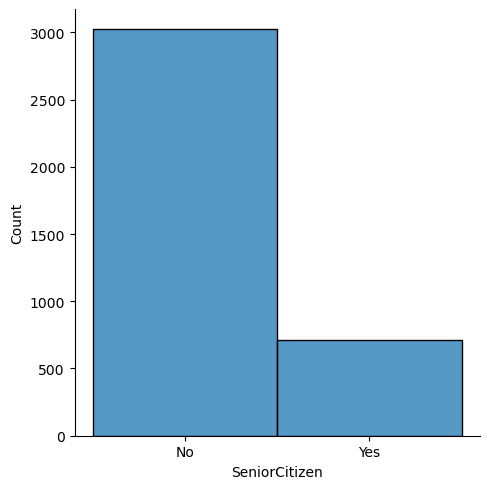

Partner


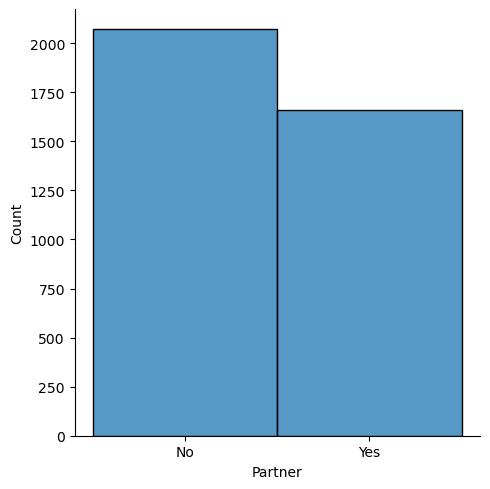

Dependents


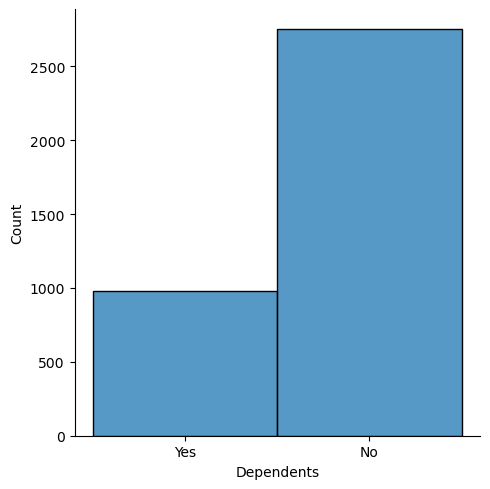

tenure


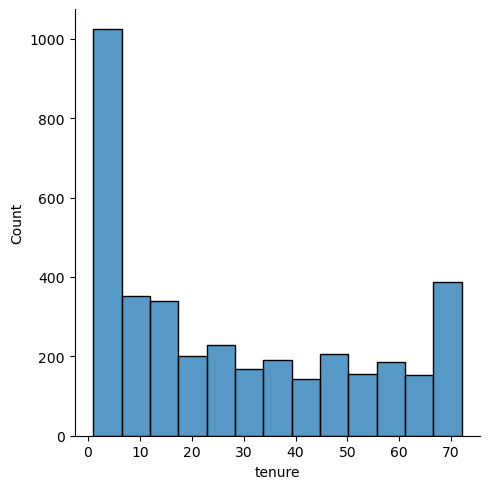

PhoneService


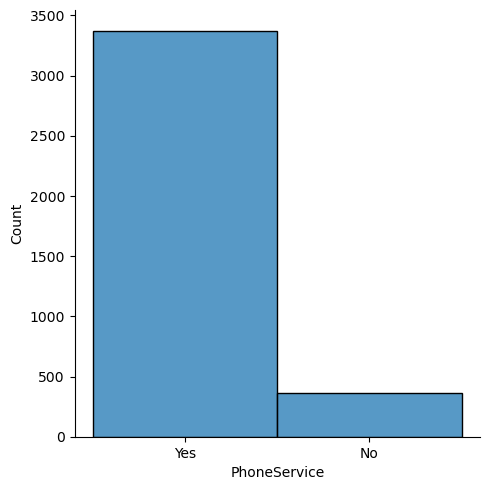

MultipleLines


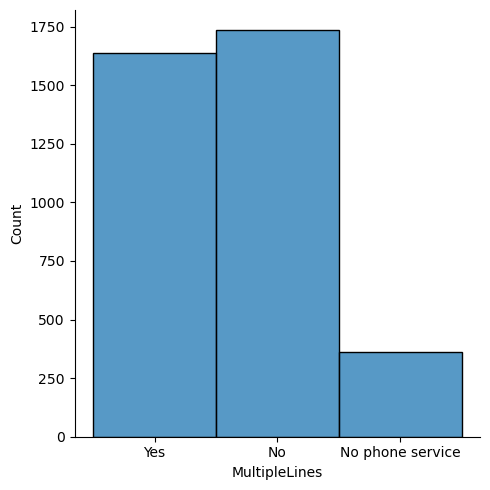

InternetService


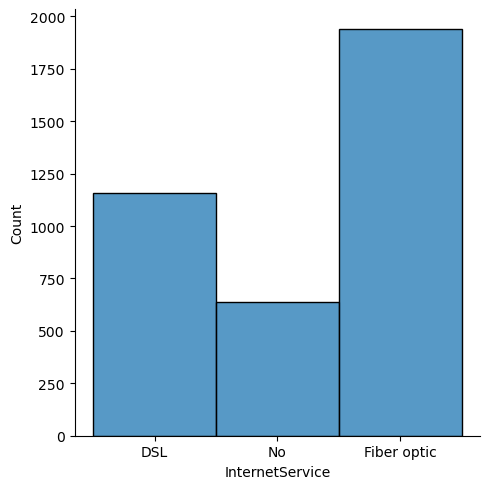

OnlineSecurity


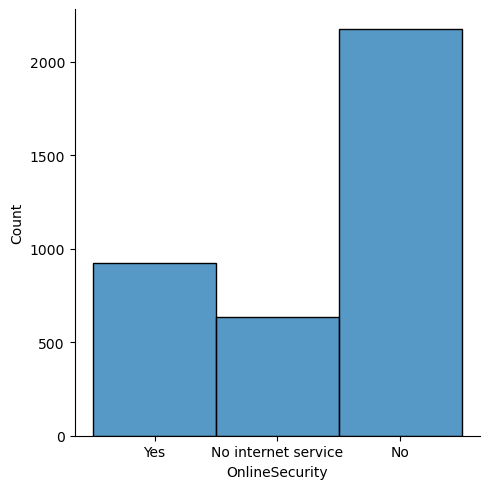

OnlineBackup


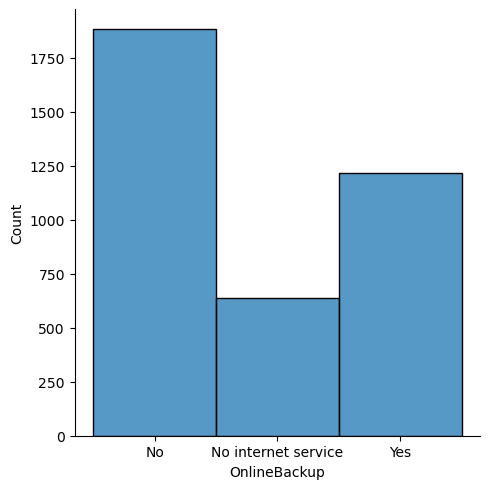

DeviceProtection


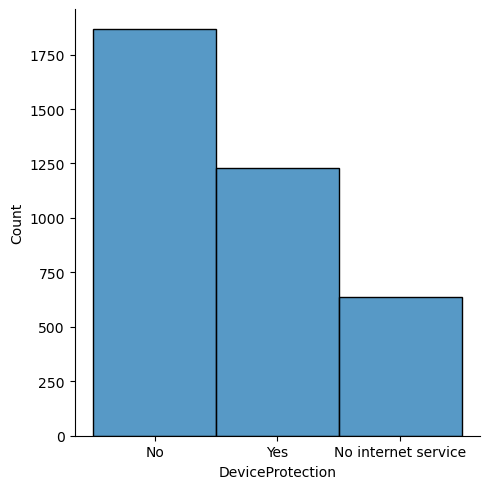

TechSupport


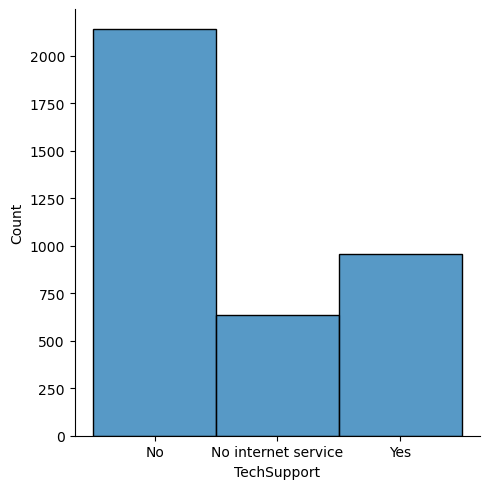

StreamingTV


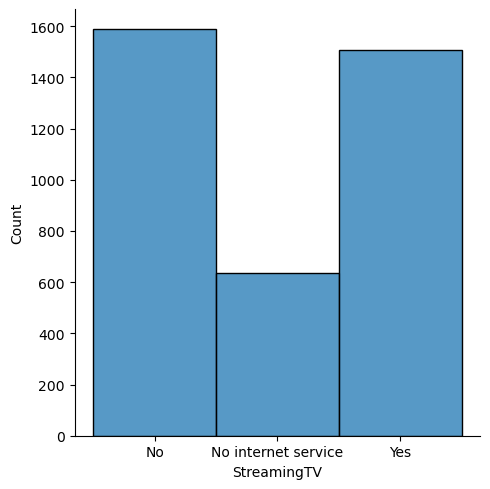

StreamingMovies


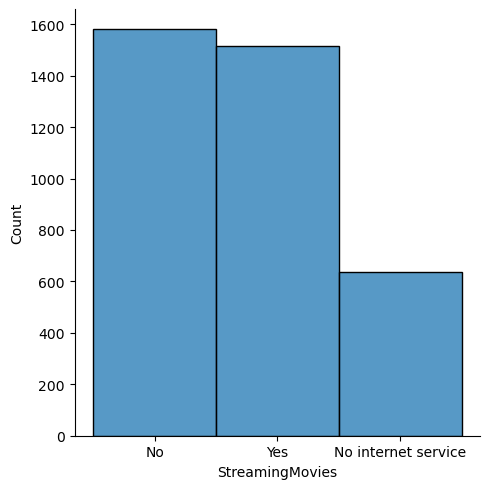

Contract


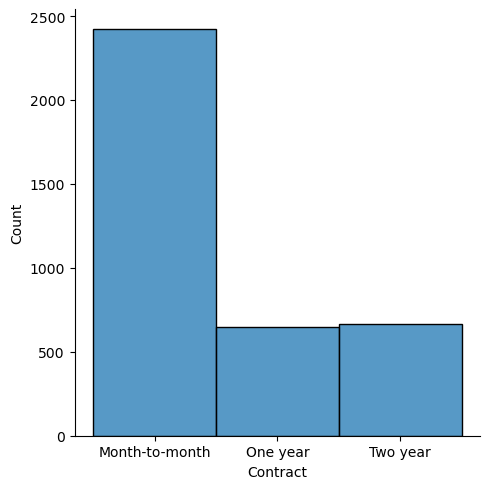

PaperlessBilling


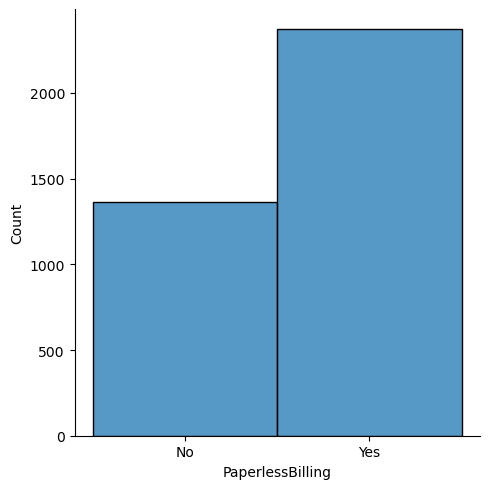

PaymentMethod


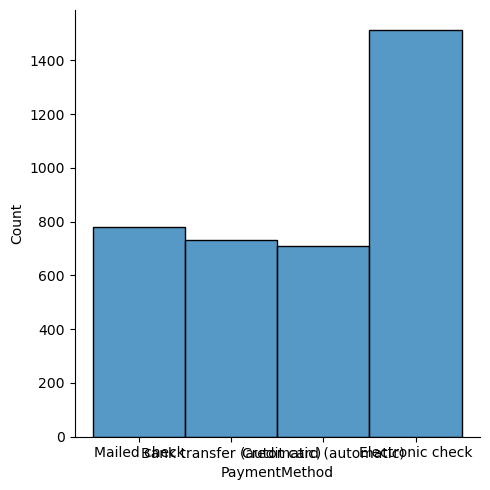

MonthlyCharges


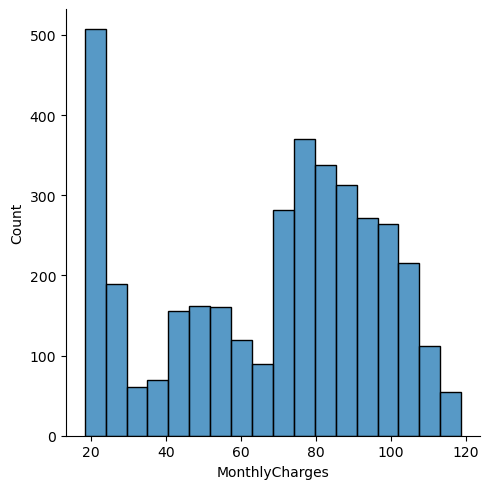

TotalCharges


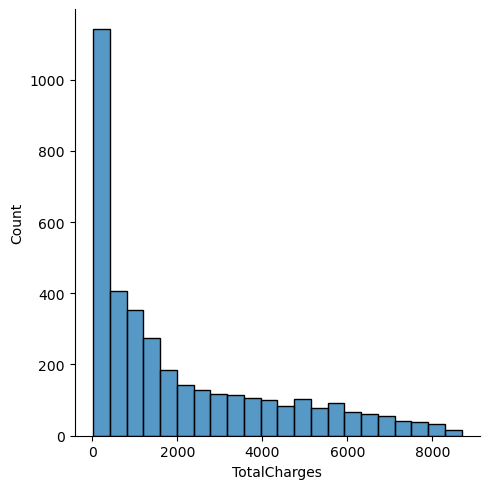

Churn


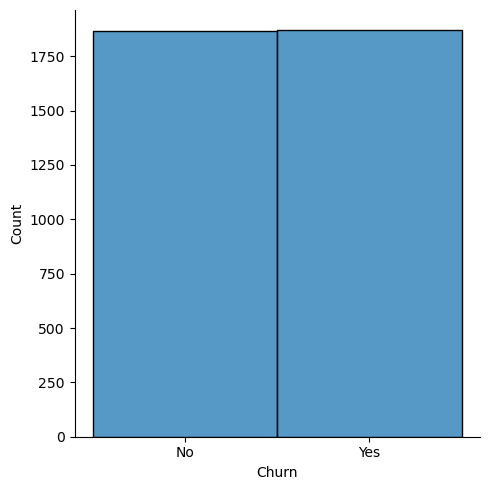

In [14]:
for col_name in df.columns:
    print(col_name)
    sns.displot(df[col_name])
    plt.show()

## Exploratory Data Analysis (EDA) Insights  
Through Exploratory Data Analysis, we uncovered critical patterns influencing customer churn:

Data Preprocessing: Handled 5 missing values in TotalCharges by dropping rows. The Churn target variable is well-balanced.

Demographics: Senior citizens, and customers without partners or dependents, show higher churn rates. Gender does not appear to be a significant factor.

Tenure & Contract: New customers (low tenure) and those on month-to-month contracts exhibit significantly higher churn. Long-term contracts are strong retention factors.

Services & Charges:

Customers lacking value-added services (e.g., Online Security, Tech Support) are more prone to churn.

Fiber optic internet users have a higher churn rate.

Higher MonthlyCharges and Electronic Check payment methods correlate with increased churn.


In [17]:
def tenure_creation(data):
    if data < 12:
        return "Below 1 year"
    elif data < 36:
        return "Below3 years"
    elif data < 60:
        return "Below 5 years"
    else:
        return "oldest Customers"

df["tenure group"] = df["tenure"].apply(tenure_creation)
df


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure group
0,Female,No,No,Yes,18,Yes,Yes,DSL,Yes,No,...,No,No,No,Month-to-month,No,Mailed check,57.65,992.70,No,Below3 years
1,Female,No,Yes,Yes,56,Yes,Yes,DSL,Yes,No,...,No,No,Yes,One year,Yes,Bank transfer (automatic),68.75,3808.00,No,Below 5 years
2,Male,No,No,No,15,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,One year,No,Mailed check,19.80,304.60,No,Below3 years
3,Male,No,Yes,Yes,38,Yes,Yes,DSL,No,Yes,...,No,Yes,Yes,One year,No,Credit card (automatic),78.95,2862.55,No,Below 5 years
4,Female,No,Yes,No,71,Yes,Yes,DSL,Yes,Yes,...,Yes,Yes,Yes,Two year,No,Credit card (automatic),89.30,6388.65,No,oldest Customers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3733,Male,No,Yes,Yes,72,Yes,No,DSL,Yes,Yes,...,Yes,Yes,No,Two year,No,Bank transfer (automatic),68.40,4855.35,No,oldest Customers
3734,Female,Yes,Yes,No,36,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,No,Month-to-month,Yes,Credit card (automatic),91.95,3301.05,No,Below 5 years
3735,Male,No,No,No,26,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),19.80,457.30,No,Below3 years
3736,Male,Yes,No,No,43,Yes,No,Fiber optic,No,No,...,No,Yes,Yes,Month-to-month,Yes,Mailed check,89.55,3856.75,Yes,Below 5 years


In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col_name in df.columns:
    df[col_name] = le.fit_transform(df[col_name])
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure group
0,0,0,0,1,17,1,2,0,2,0,...,0,0,0,0,0,3,402,1508,0,2
1,0,0,1,1,55,1,2,0,2,0,...,0,0,2,1,1,0,532,2693,0,1
2,1,0,0,0,14,1,0,2,1,1,...,1,1,1,1,0,3,23,785,0,2
3,1,0,1,1,37,1,2,0,0,2,...,0,2,2,1,0,1,698,2419,0,1
4,0,0,1,0,70,1,2,0,2,2,...,2,2,2,2,0,1,873,3266,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3733,1,0,1,1,71,1,0,0,2,2,...,2,2,0,2,0,0,527,2943,0,3
3734,0,1,1,0,35,1,2,1,0,2,...,0,2,0,0,1,1,922,2552,0,1
3735,1,0,0,0,25,1,0,2,1,1,...,1,1,1,1,0,1,23,999,0,2
3736,1,1,0,0,42,1,0,1,0,0,...,0,2,2,0,1,3,878,2706,1,1


In [19]:
# Splitting the dataset in X and Y

X = df.drop('Churn',axis=1)
Y = df['Churn']

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=100, stratify = Y)

In [25]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=10000)

In [26]:
lr.fit(X_train, Y_train)

LogisticRegression(max_iter=10000)

In [ ]:
Y_pred = lr.predict(X_test)

In [28]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.80      0.75      0.77       373
           1       0.76      0.81      0.79       374

    accuracy                           0.78       747
   macro avg       0.78      0.78      0.78       747
weighted avg       0.78      0.78      0.78       747



In [30]:
df["Churn"].value_counts()

Churn
1    1869
0    1864
Name: count, dtype: int64

## Conclusion  
This project successfully developed a machine learning model to predict customer churn, revealing key actionable insights:

Model Performance: The model effectively predicts customer churn, providing a valuable tool for proactive retention.

Primary Churn Drivers:

Contract Type: Month-to-month contracts are the strongest predictor of churn.

Value-Added Services: Absence of services like Tech Support and Online Security significantly increases churn risk.

Tenure: Newer customers have a higher propensity to churn.

Internet Service & Charges: Fiber optic users and those with higher monthly charges show increased churn.

Business Recommendations:

Incentivize Long-Term Contracts: Encourage transitions from month-to-month plans.

Promote Security & Support Services: Highlight the value of retention-boosting services.

Target New Customers: Implement specific onboarding and early retention programs.

Analyze Service Specifics: Investigate churn drivers within the Fiber Optic segment and electronic payment methods.

Future Enhancements: Explore advanced feature engineering, evaluate more complex models (e.g., XGBoost), and integrate real-time prediction for immediate intervention.